In [22]:
import torch
import joblib
from lib.preprocess import load_data
import os
import numpy as np
import pandas as pd
from lib.local_utils import plot_activity

In [23]:
project_name = '0911_convbbt_4'

In [24]:
project_path = os.path.join('result', project_name)
model_path = os.path.join(project_path, 'raw', 'model.pt')
param_path = os.path.join(project_path, 'raw', 'param.pkl')
predict_path = os.path.join(project_path, 'raw', 'predict.csv')
# model = torch.load(model_path)
param = joblib.load(param_path)
predicts = pd.read_csv(predict_path, index_col=0)

In [25]:
x_train, x_test, y_train, y_test = load_data(
    param['LABELS'], param['TIME_PERIODS'], param['STEP_DISTANCE'], param['LABEL'], param['N_FEATURES'], param['SEED']
)

In [26]:
predicts.loc[predicts.predict != predicts.true]

,predict,true
23,1,4
56,0,5
61,0,4
87,5,4
100,0,4
...,...,...
8130,4,5
8144,4,5
8191,5,0
8215,4,1


In [27]:
param['LABELS']

['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']

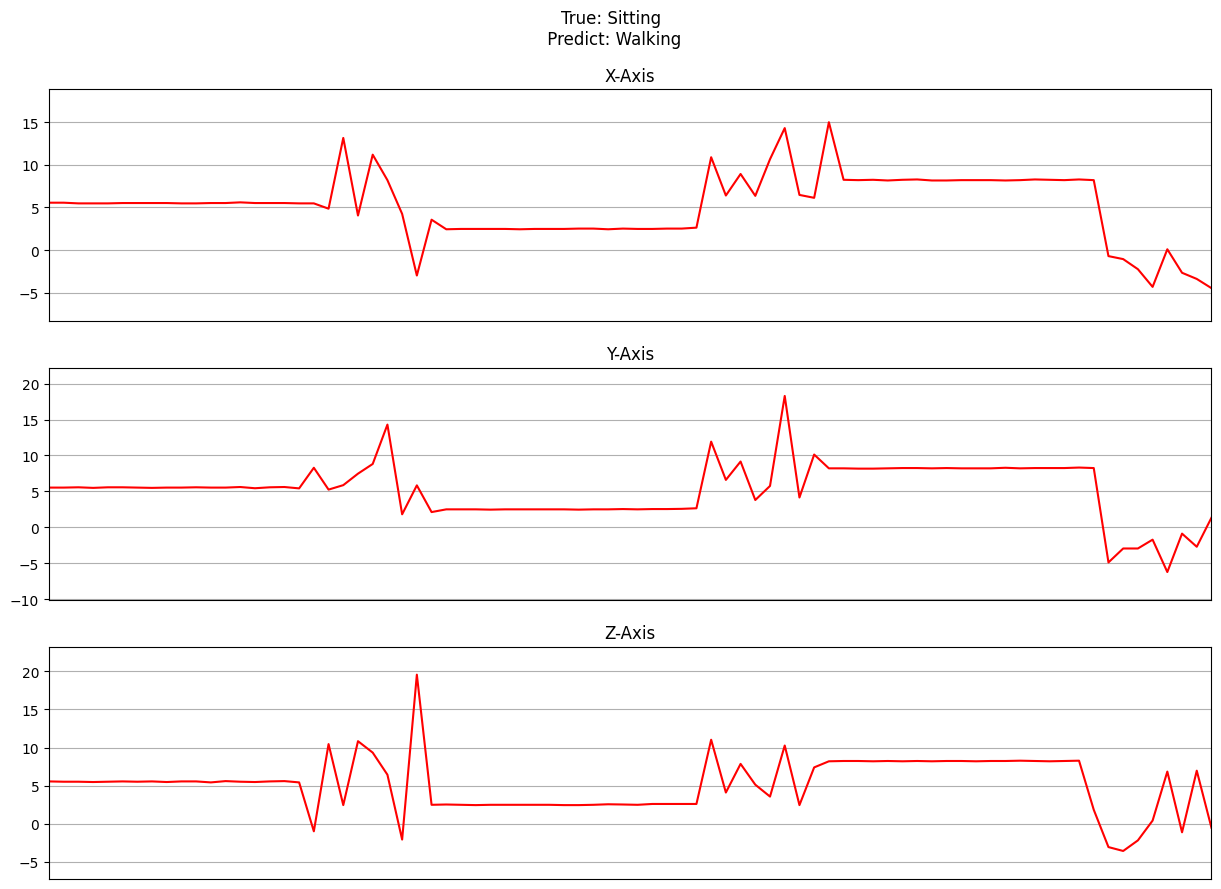

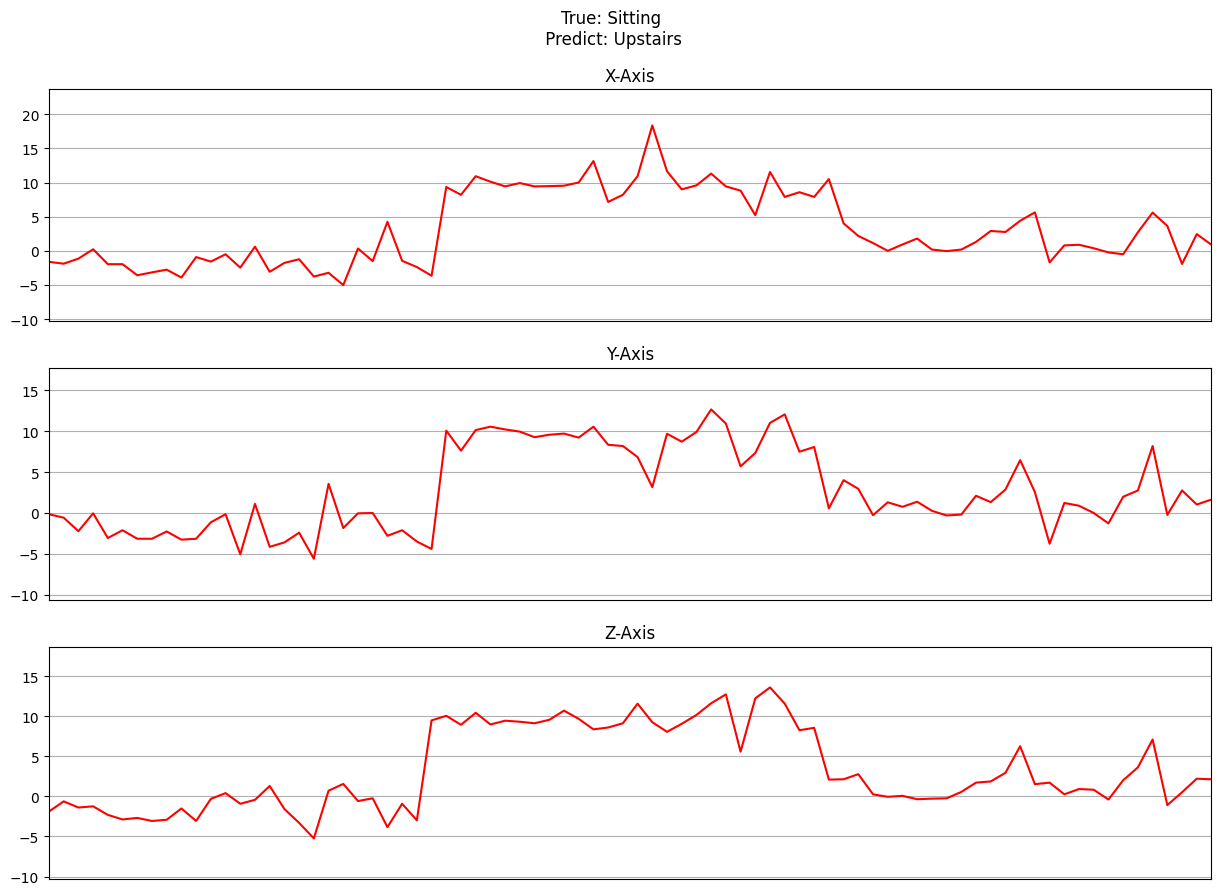

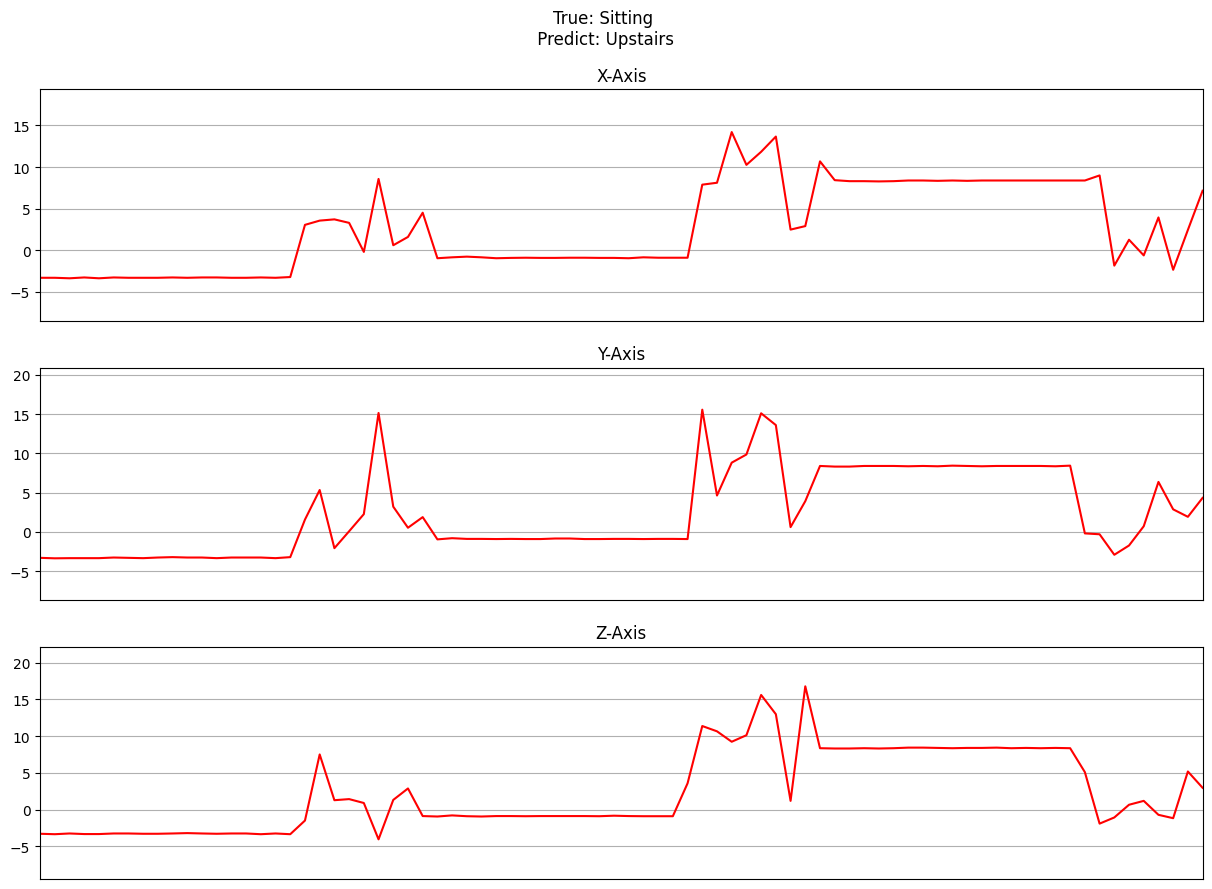

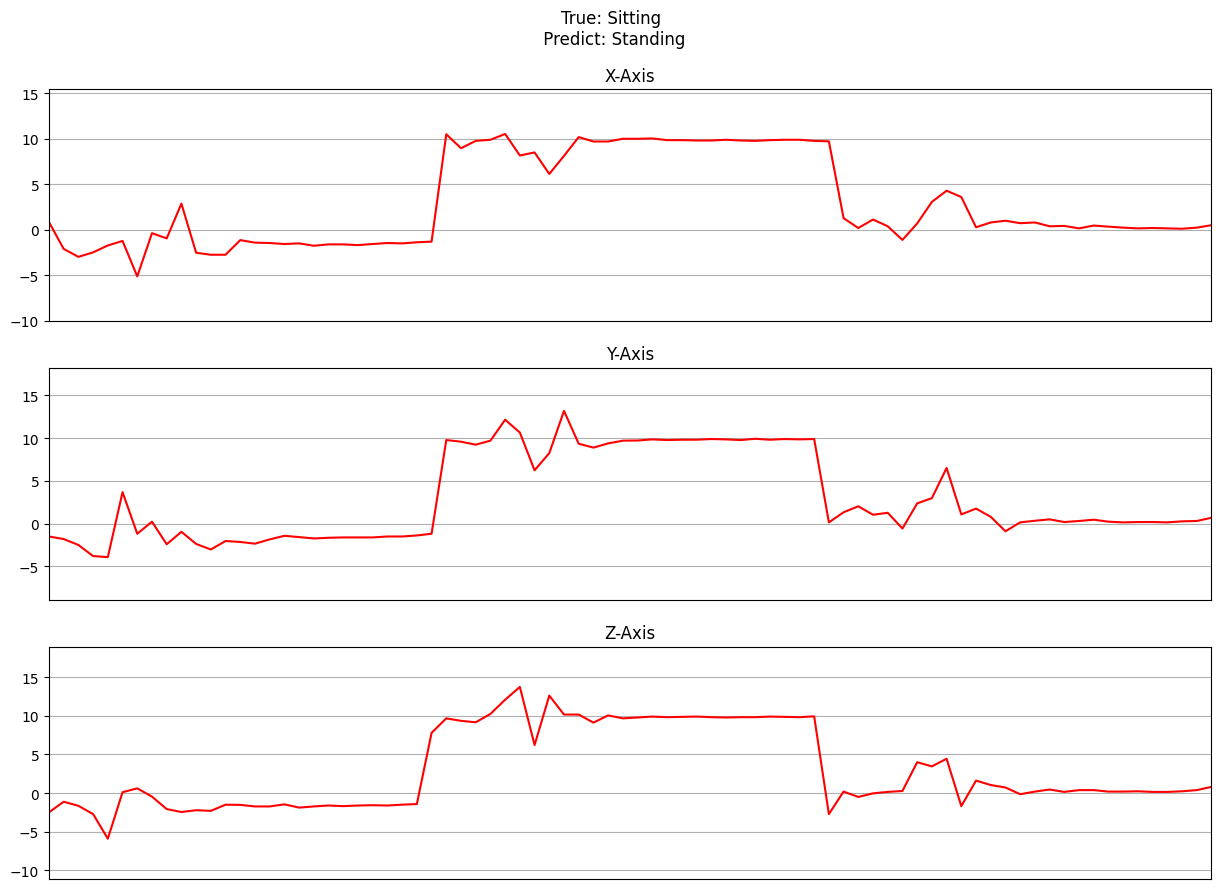

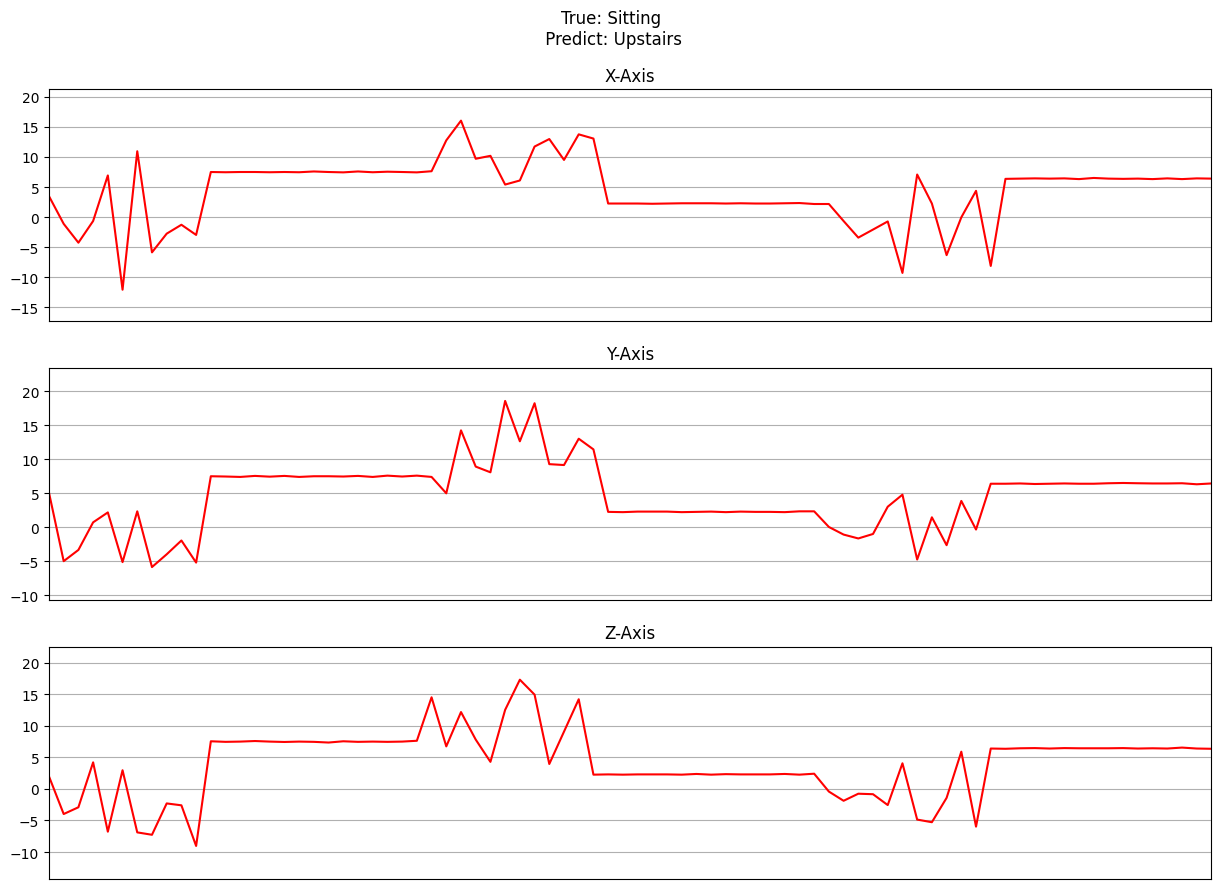

In [28]:
for idx in predicts.loc[(predicts.predict != predicts.true)&(predicts.true==2)].index:
    plot_activity(f"True: {param['LABELS'][predicts.loc[idx,'true']]}\n Predict: {param['LABELS'][predicts.loc[idx,'predict']]}", x_test[idx])

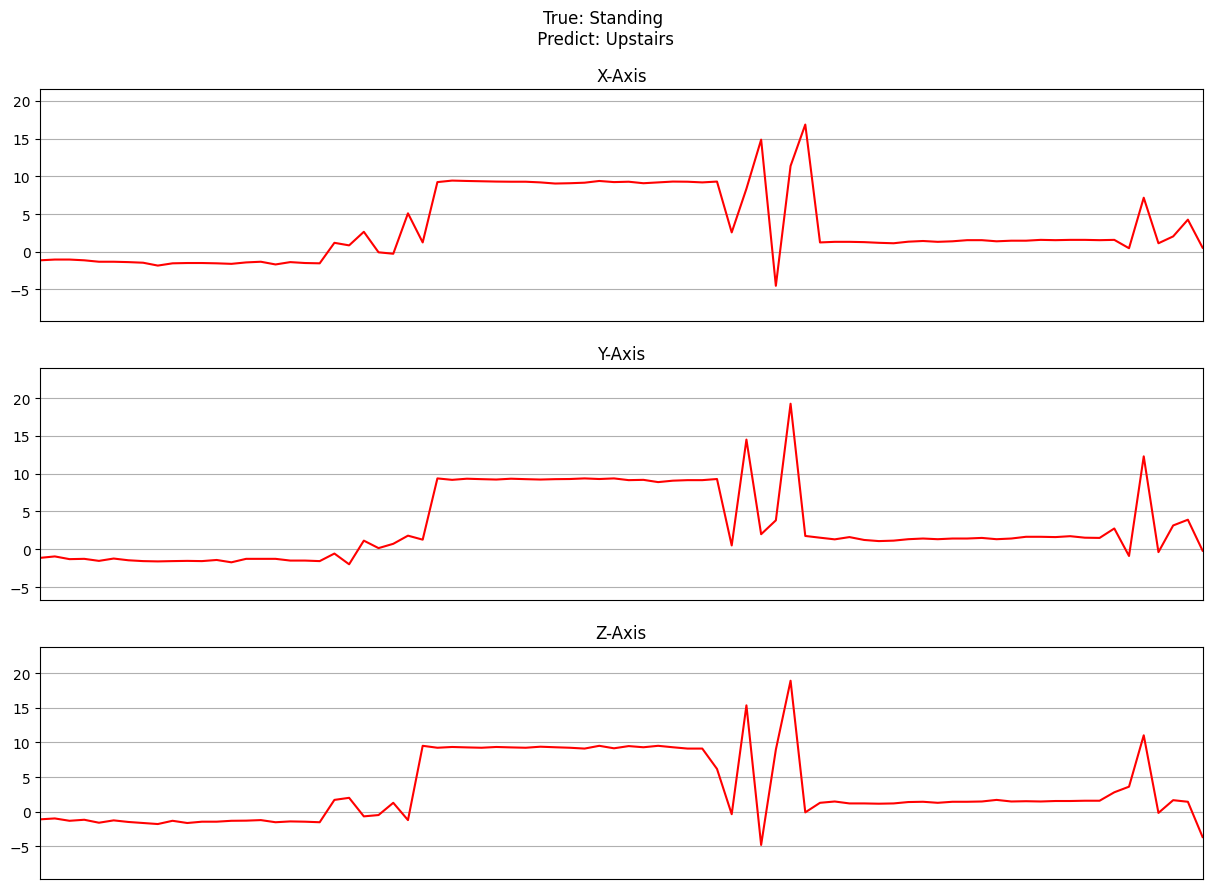

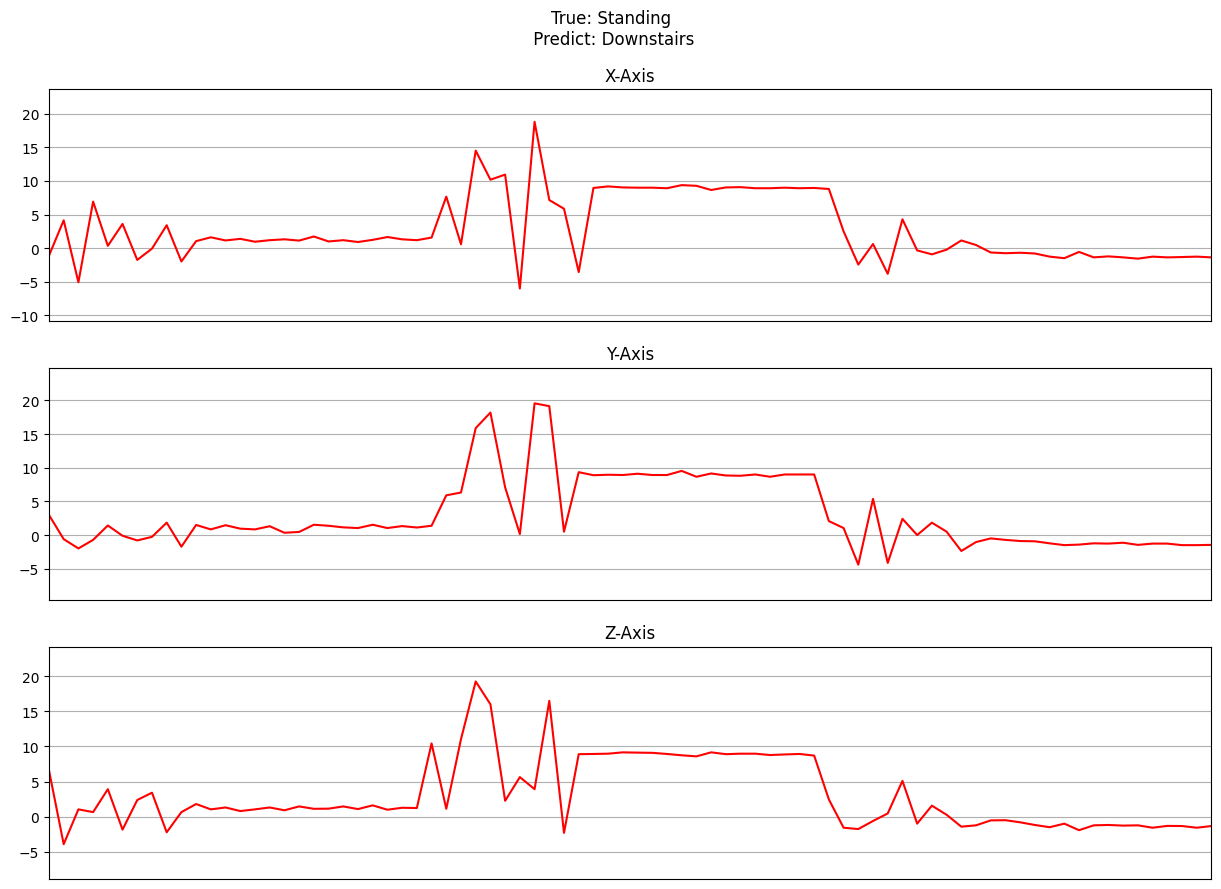

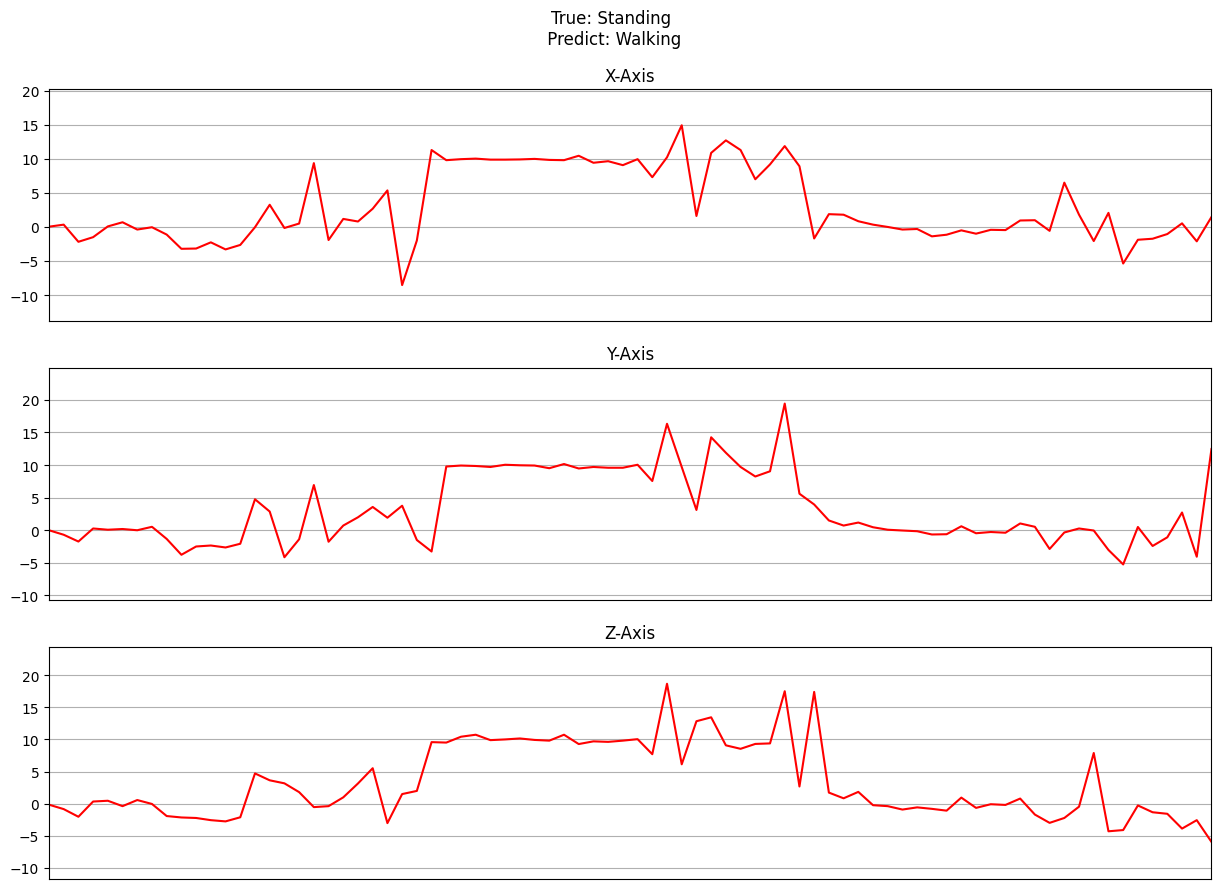

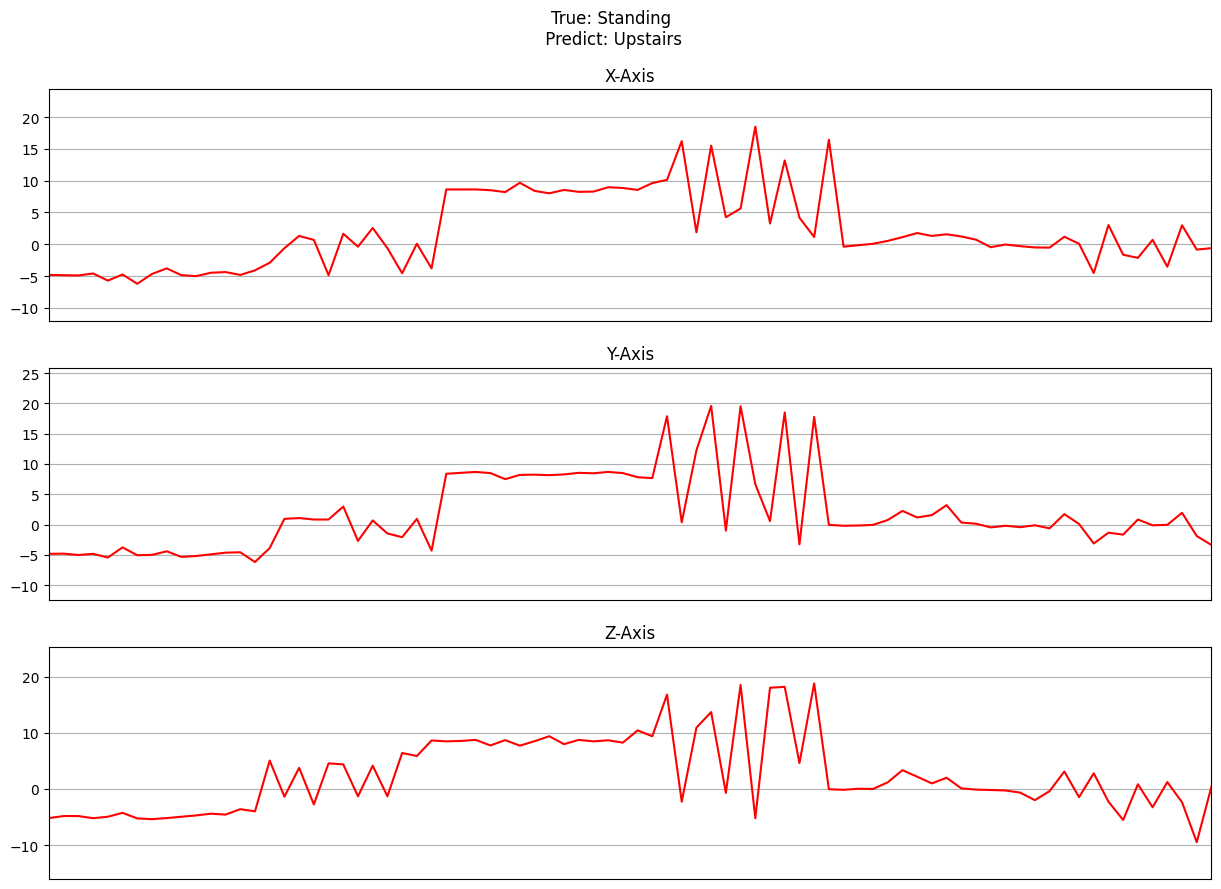

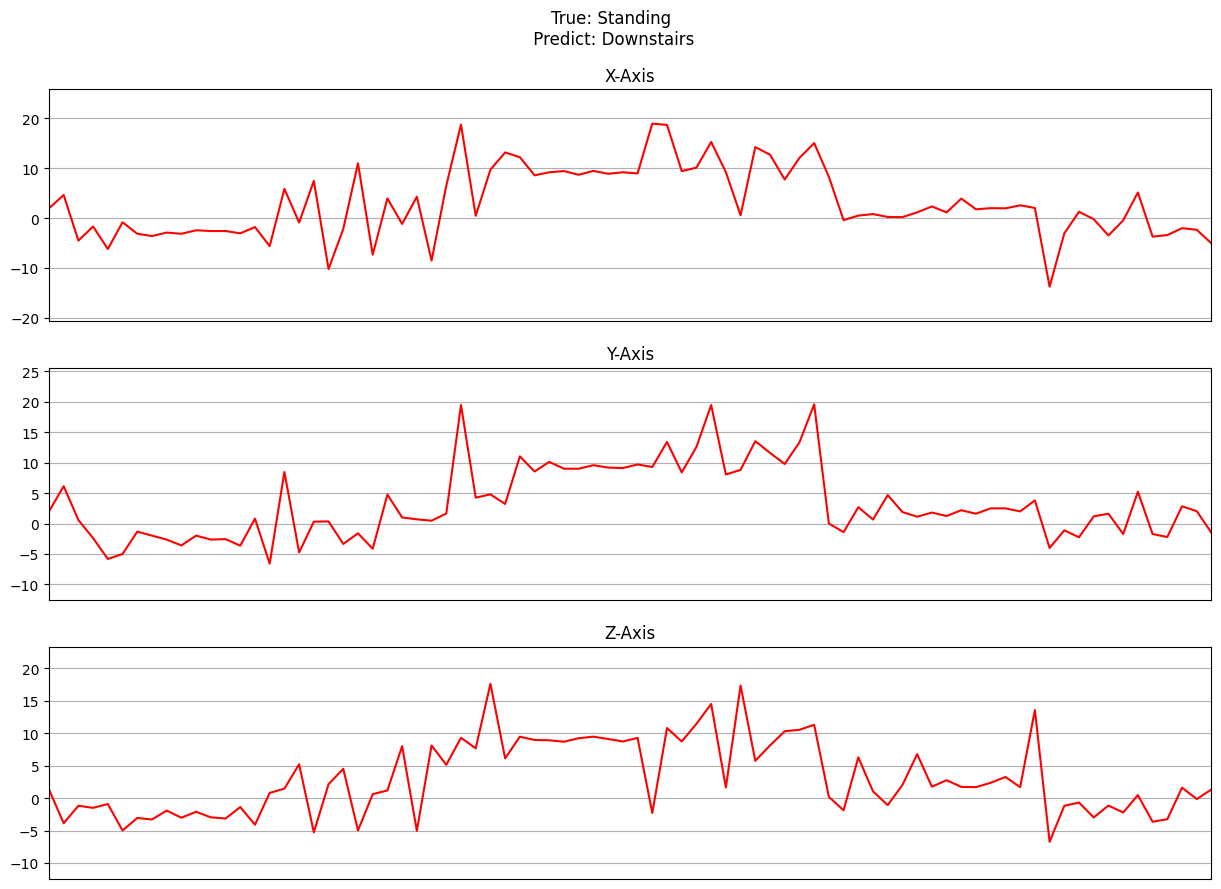

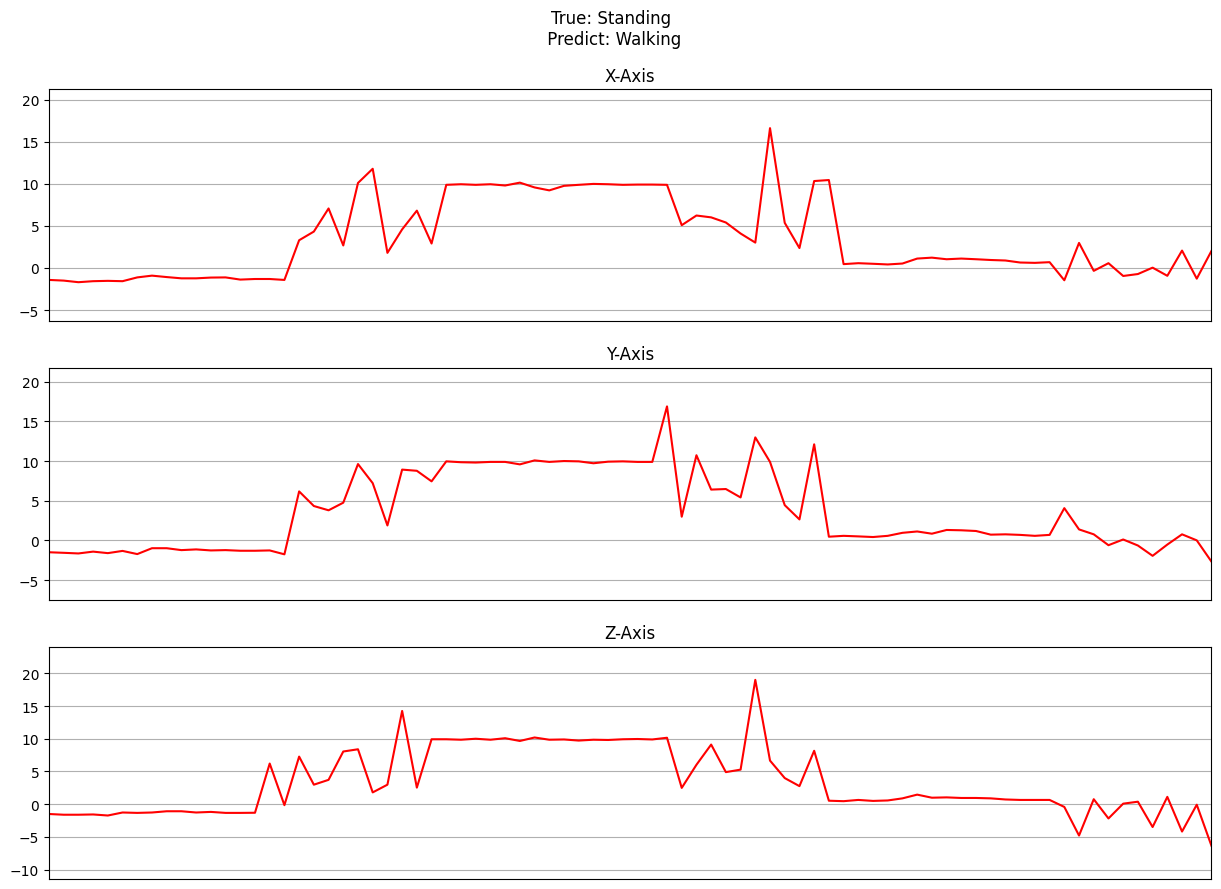

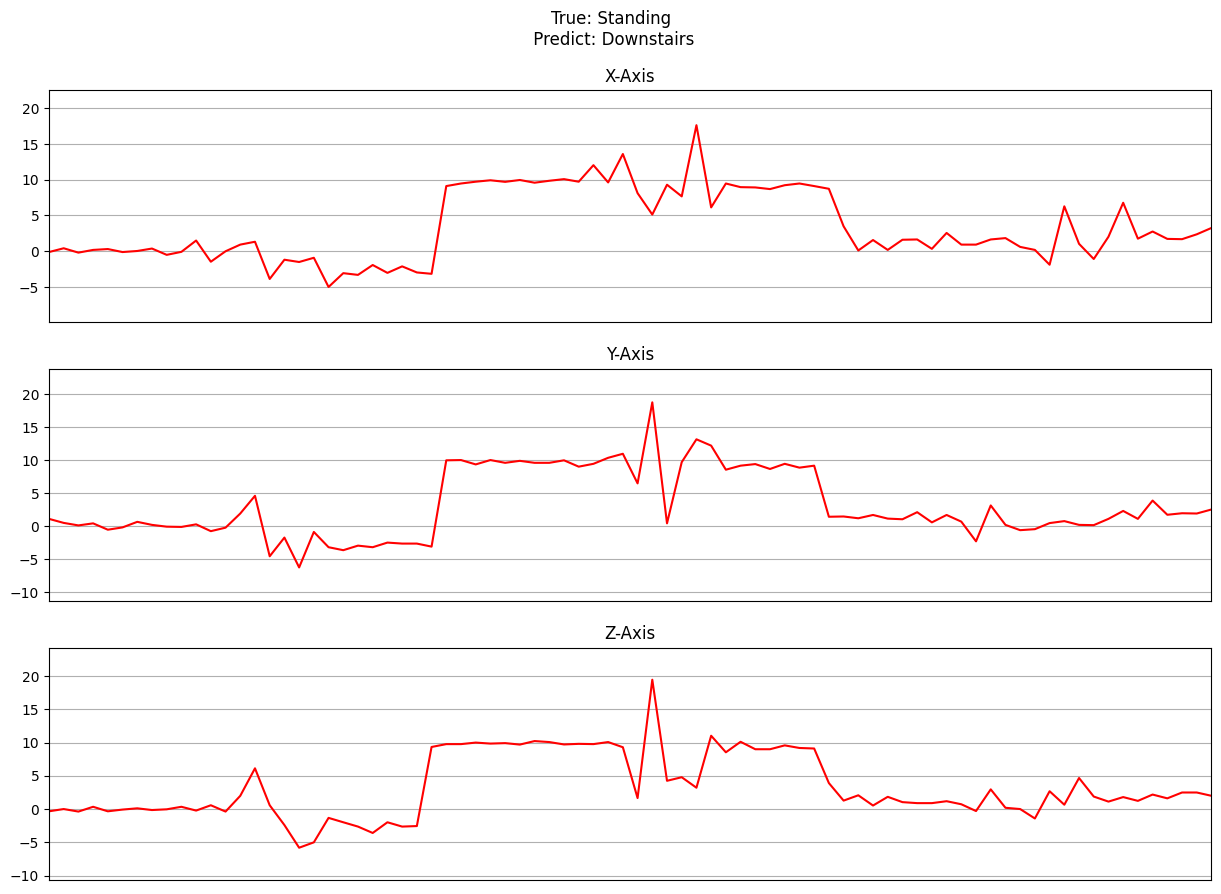

In [29]:
for idx in predicts.loc[(predicts.predict != predicts.true)&(predicts.true==3)].index:
    plot_activity(f"True: {param['LABELS'][predicts.loc[idx,'true']]}\n Predict: {param['LABELS'][predicts.loc[idx,'predict']]}", x_test[idx])

In [32]:
import glob
#ライブラリのインポート
from PIL import Image
#画像を入れる箱を準備
pictures=[]
#画像を箱に入れていく
for pic_name in glob.glob('miss_activity_plots/True: Sitting*.png'):
    img = Image.open(pic_name)
    pictures.append(img)
#gifアニメを出力する
pictures[0].save('miss_activity_plots/Sitting.gif',save_all=True, append_images=pictures[1:],optimize=True, duration=500, loop=0)

In [33]:
#画像を入れる箱を準備
pictures=[]
#画像を箱に入れていく
for pic_name in glob.glob('miss_activity_plots/True: Standing*.png'):
    img = Image.open(pic_name)
    pictures.append(img)
#gifアニメを出力する
pictures[0].save('miss_activity_plots/Standing.gif',save_all=True, append_images=pictures[1:],optimize=True, duration=500, loop=0)

/home/nakagawaren/humanactivityrecognition_portfolio/lib/local_utils.py:85: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])


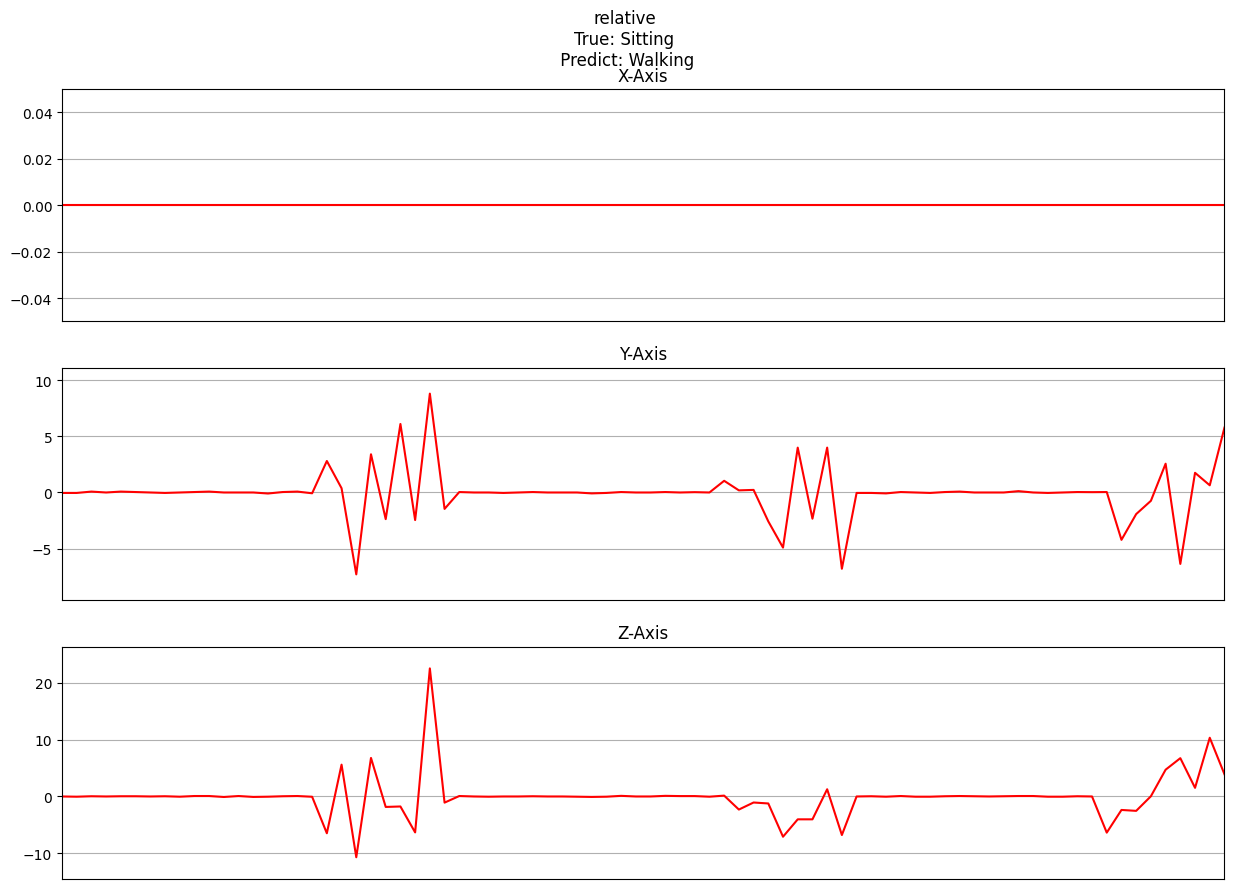

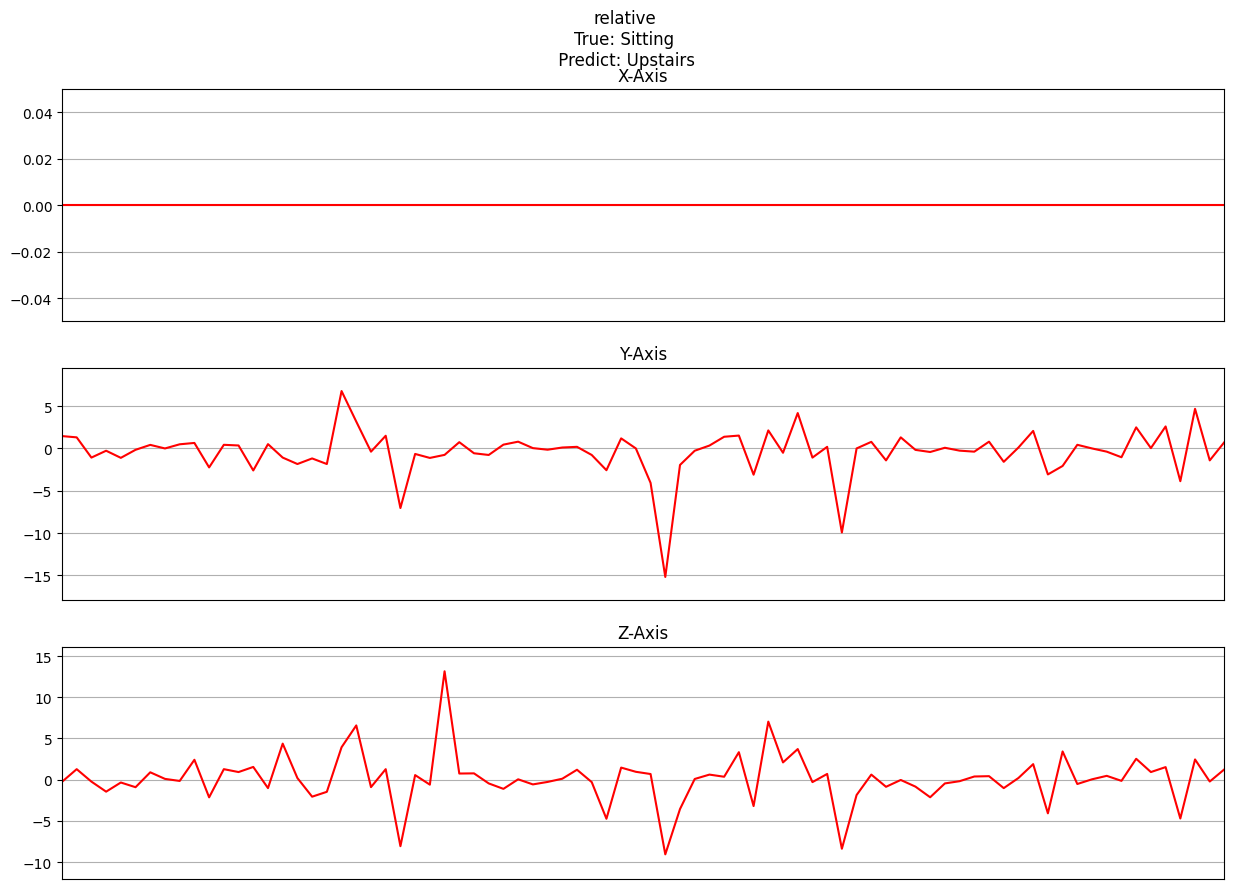

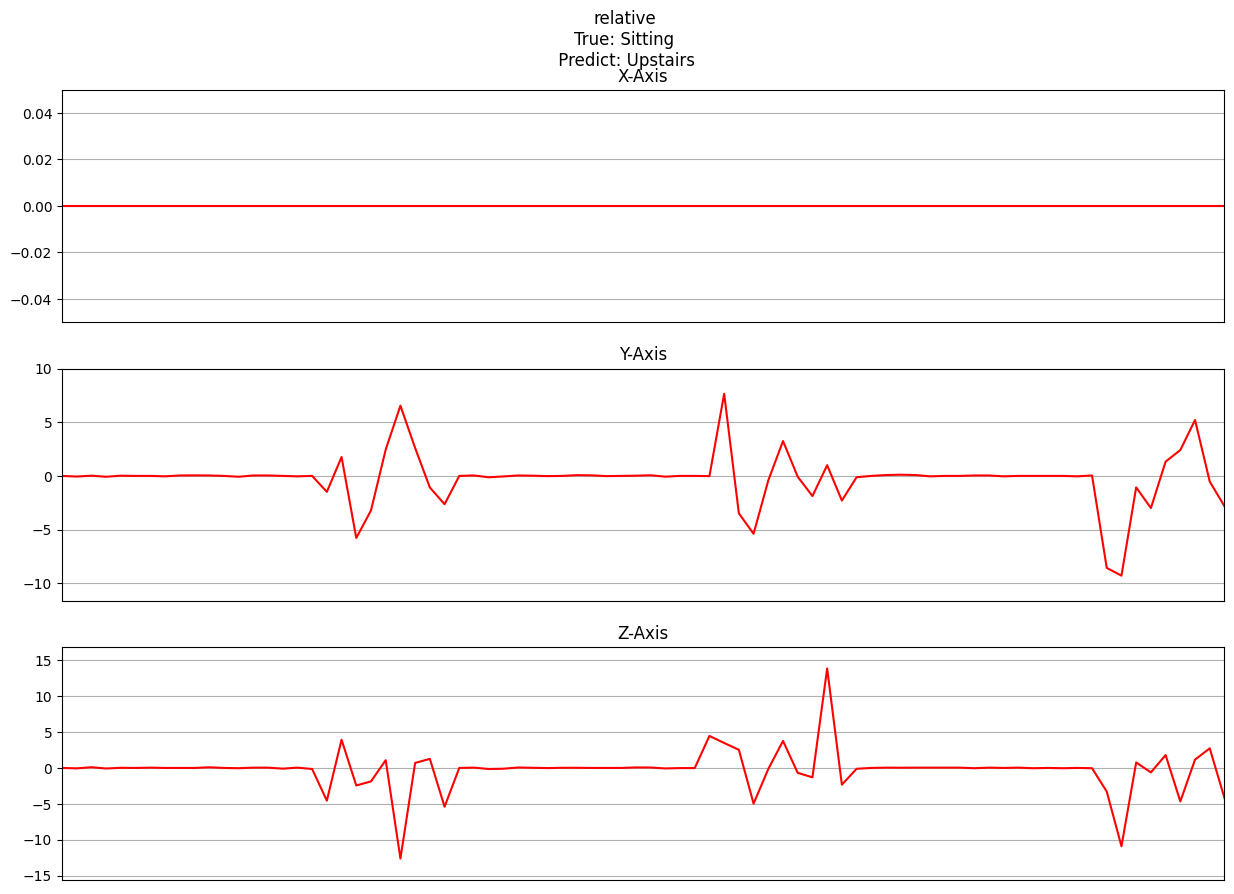

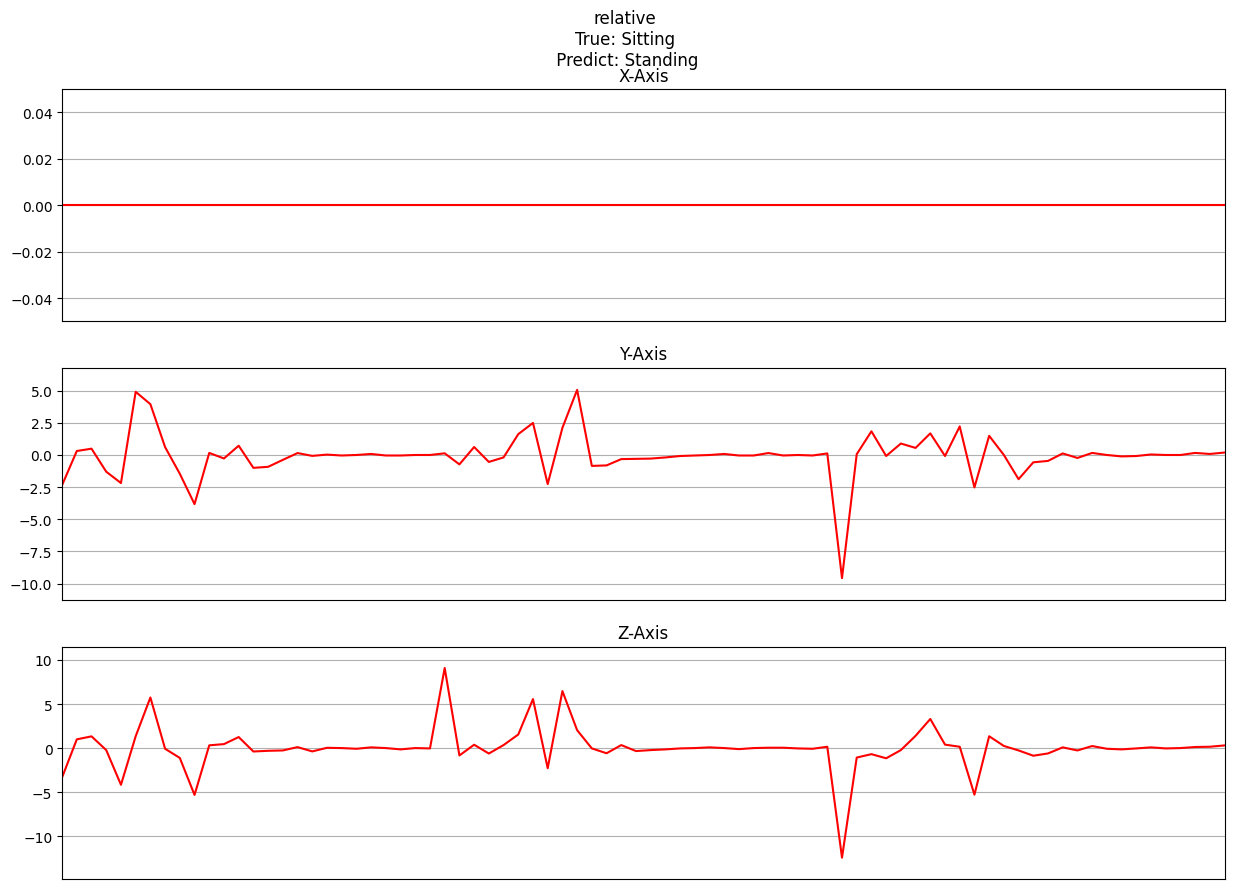

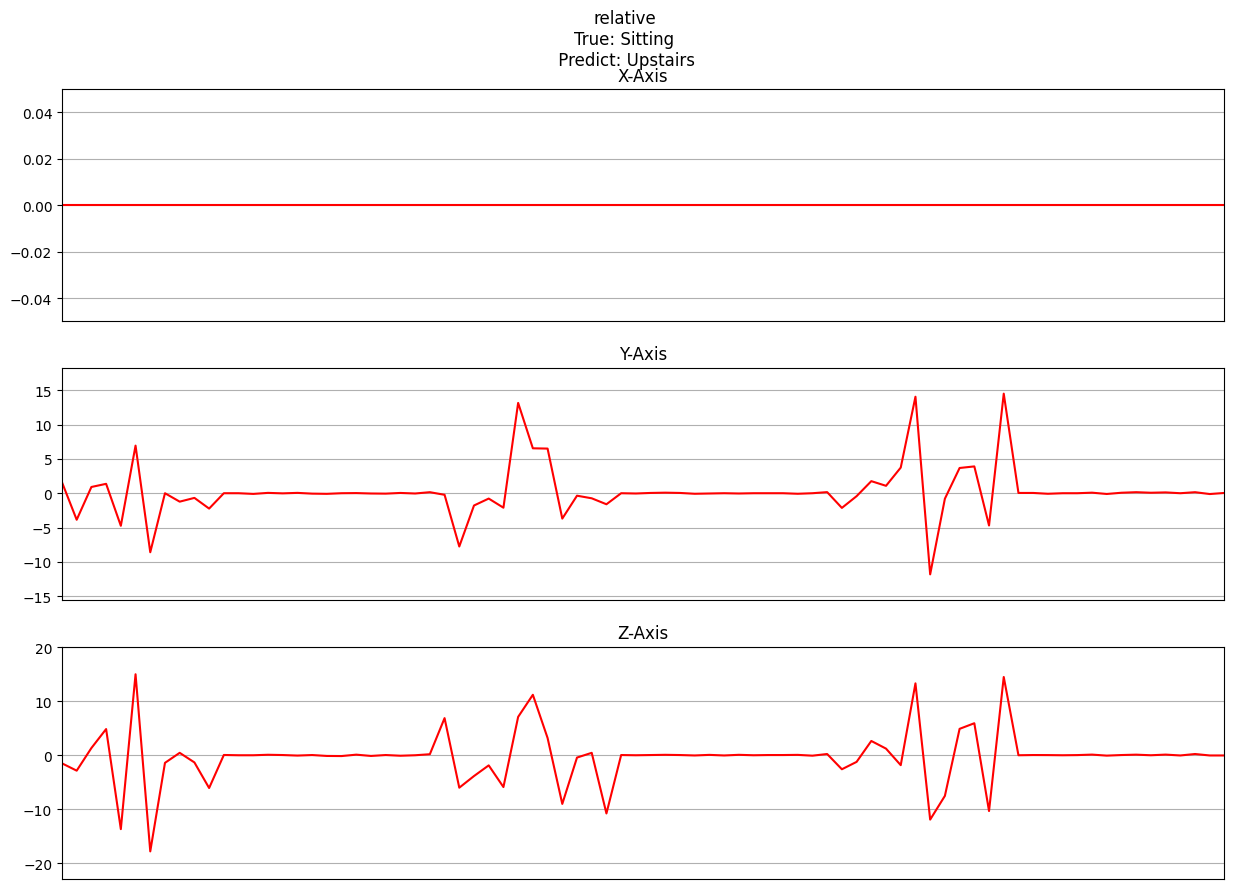

In [45]:
for idx in predicts.loc[(predicts.predict != predicts.true)&(predicts.true==2)].index:
    plot_activity(f"relative\nTrue: {param['LABELS'][predicts.loc[idx,'true']]}\n Predict: {param['LABELS'][predicts.loc[idx,'predict']]}",
                    x_test[idx] - np.tile(x_test[idx,:,0], (3,1)).T
)

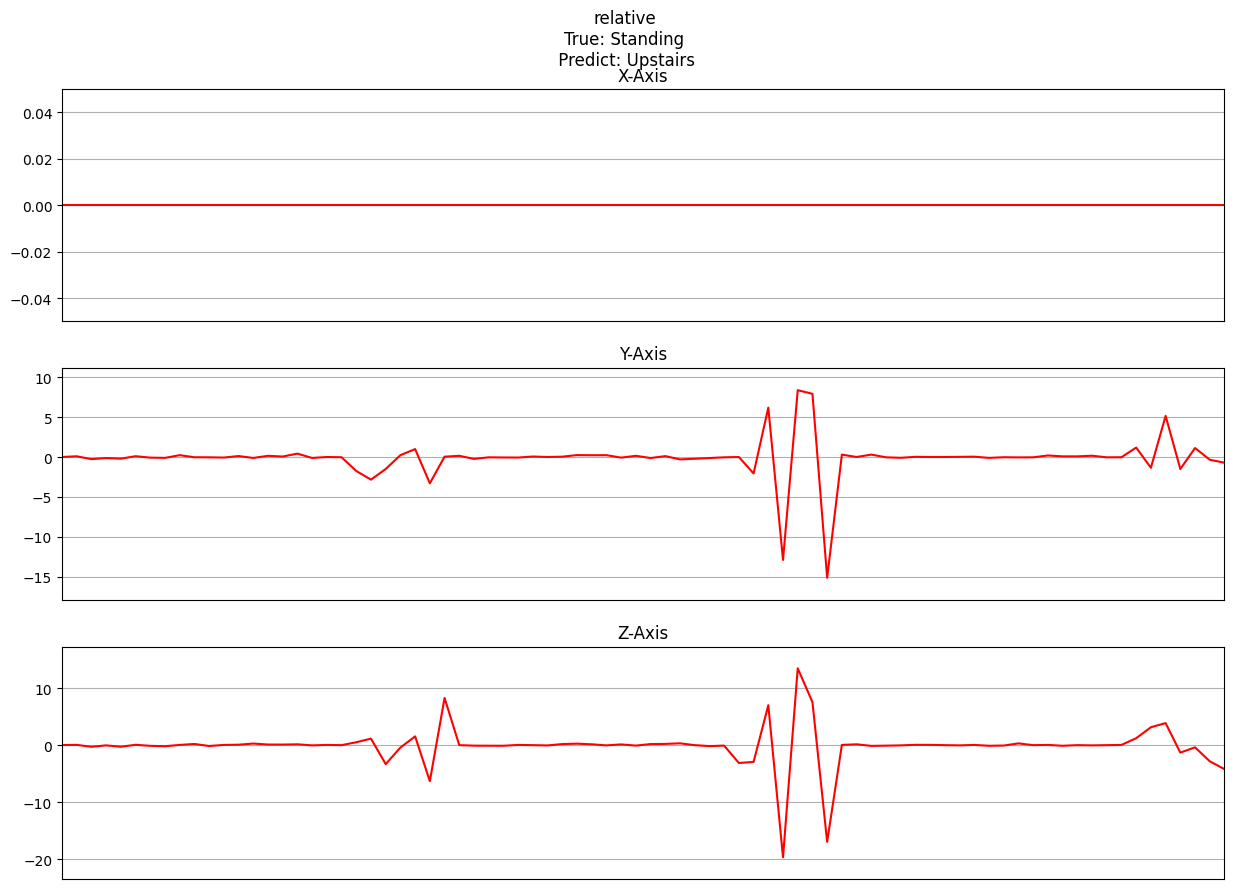

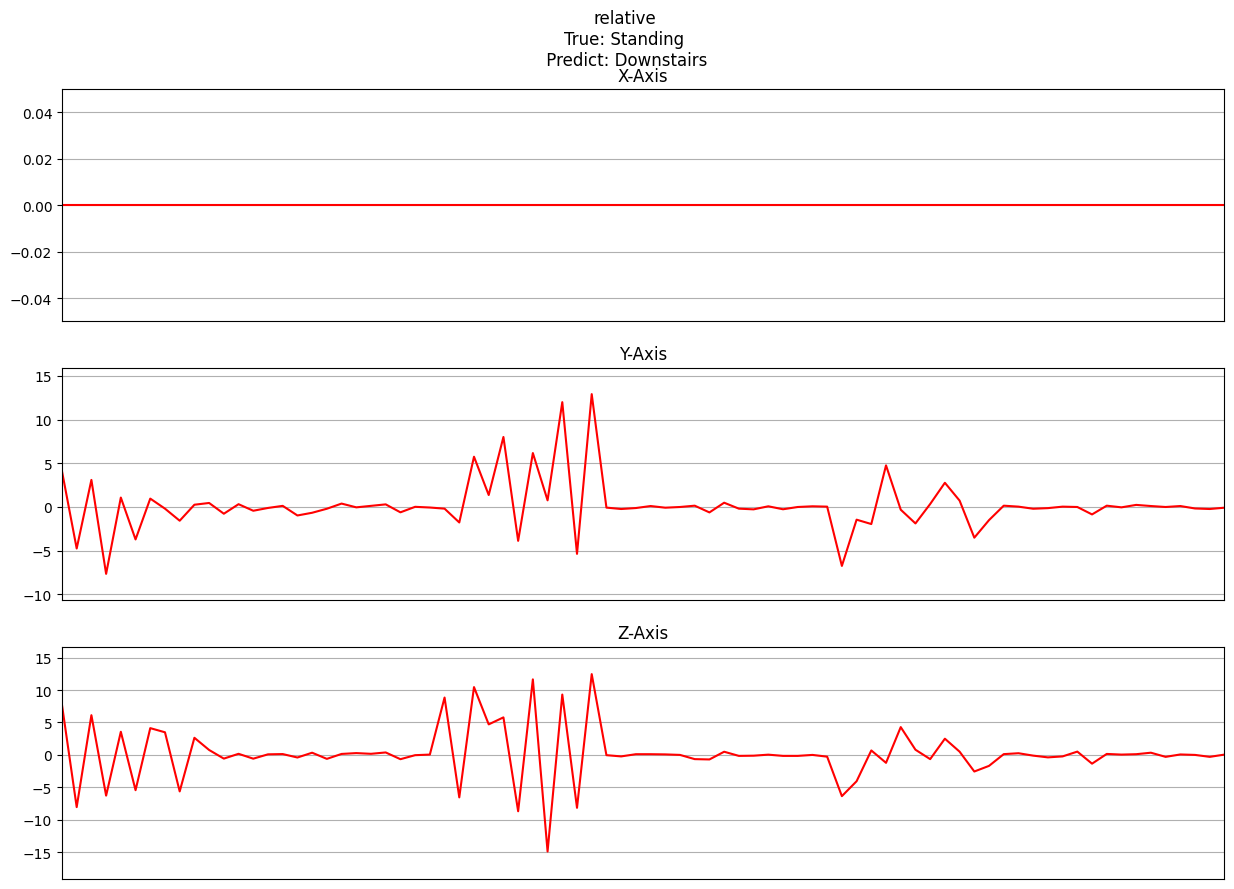

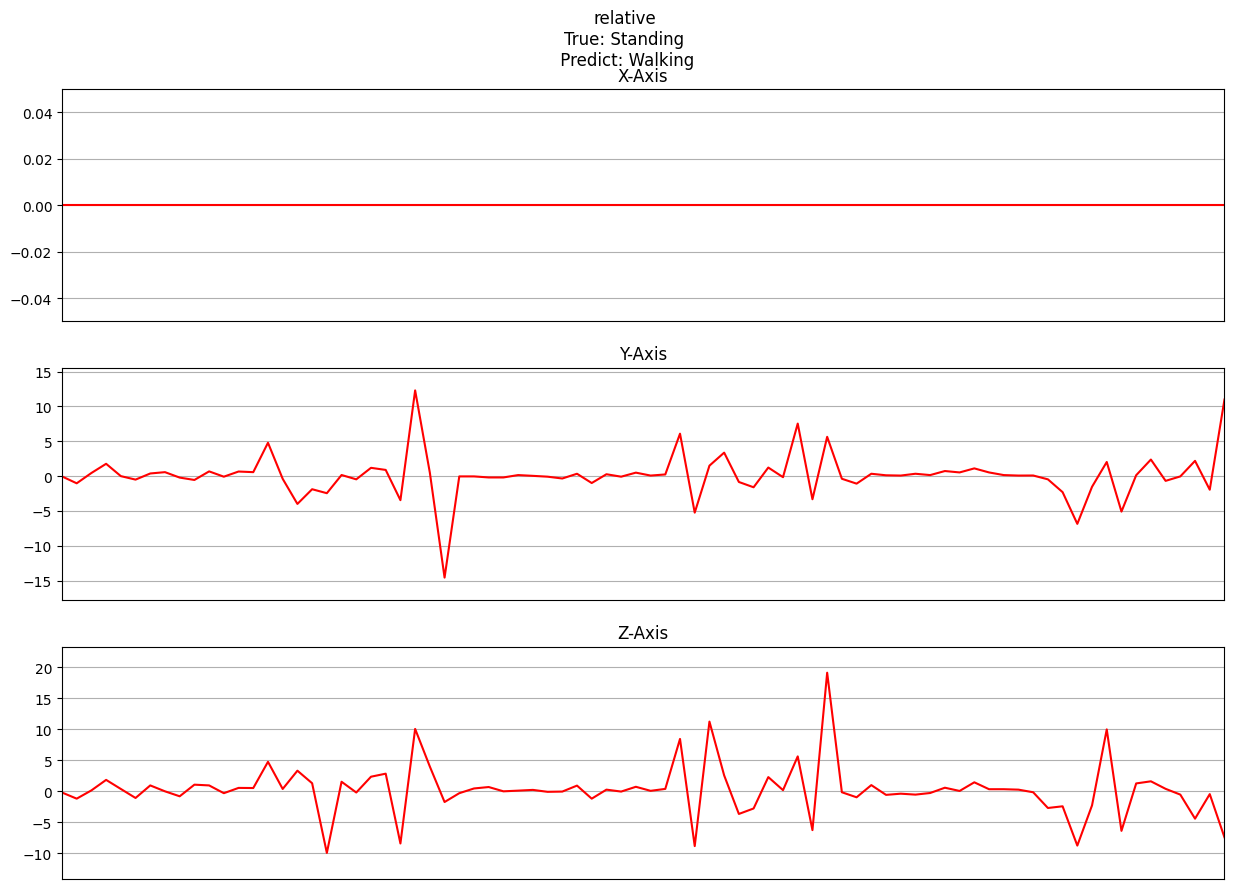

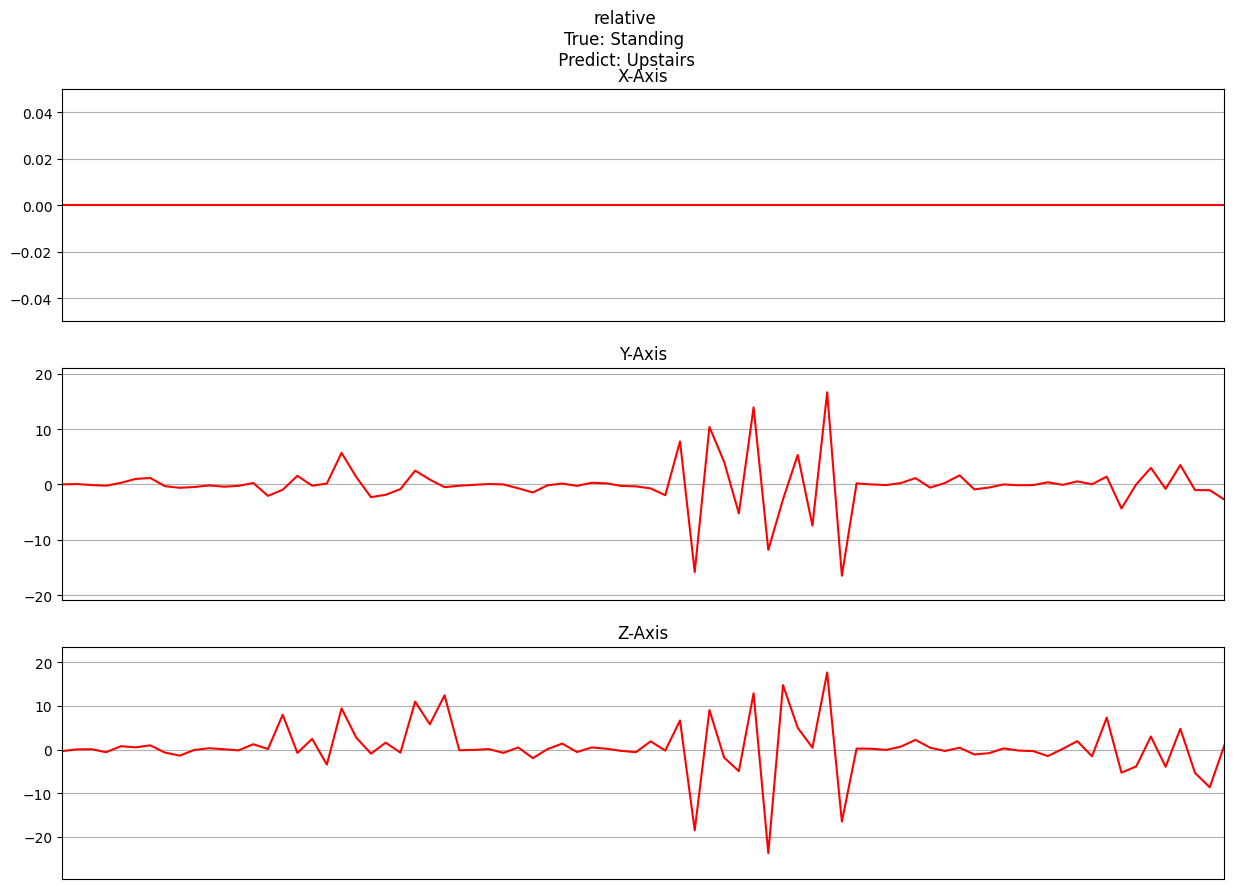

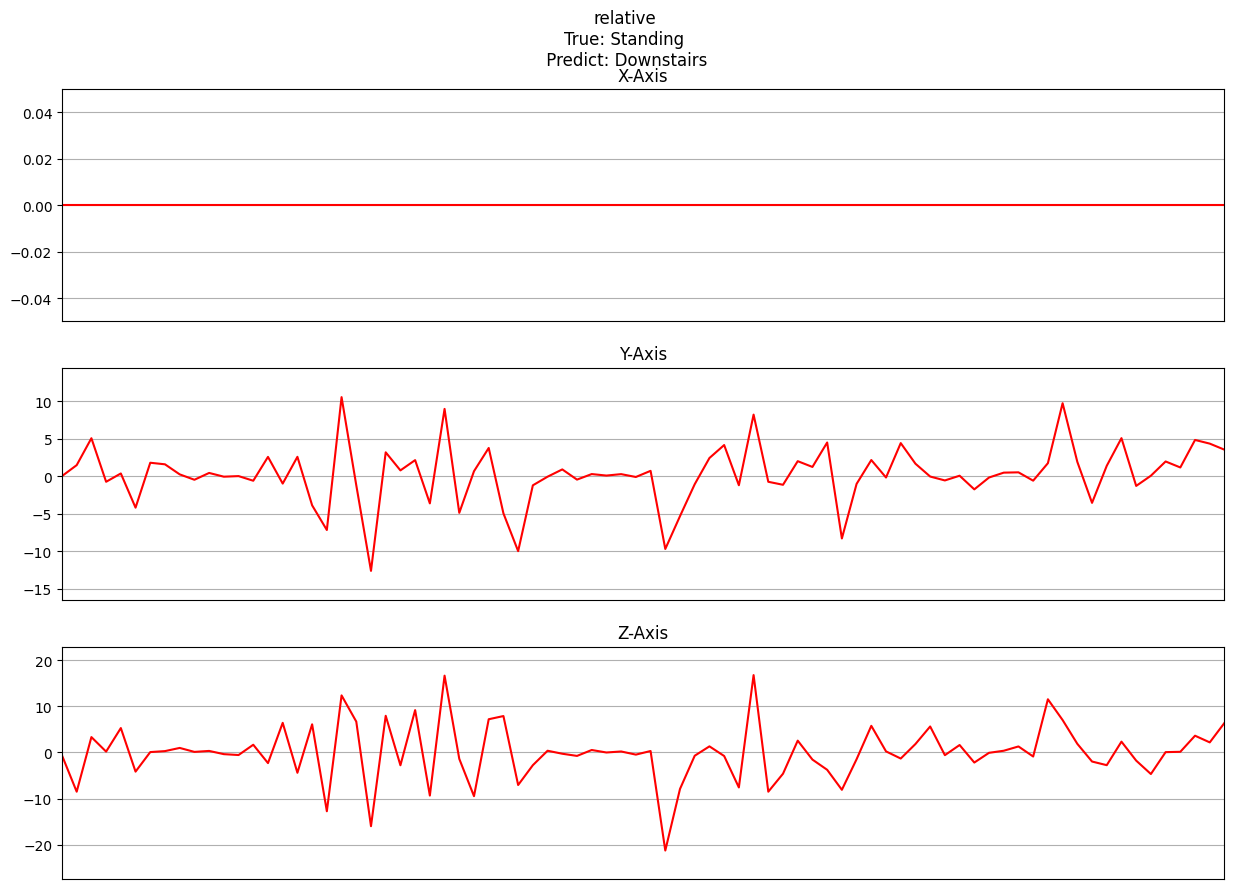

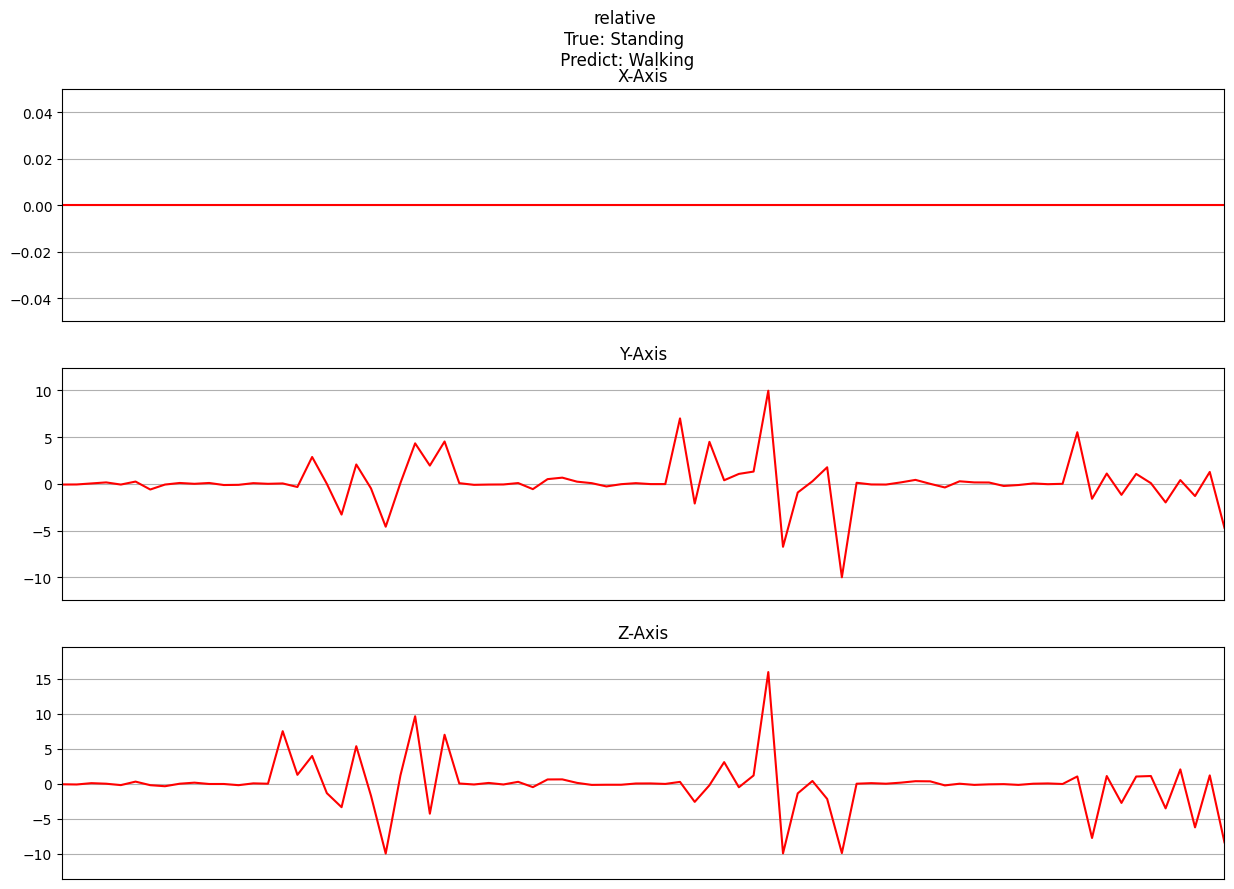

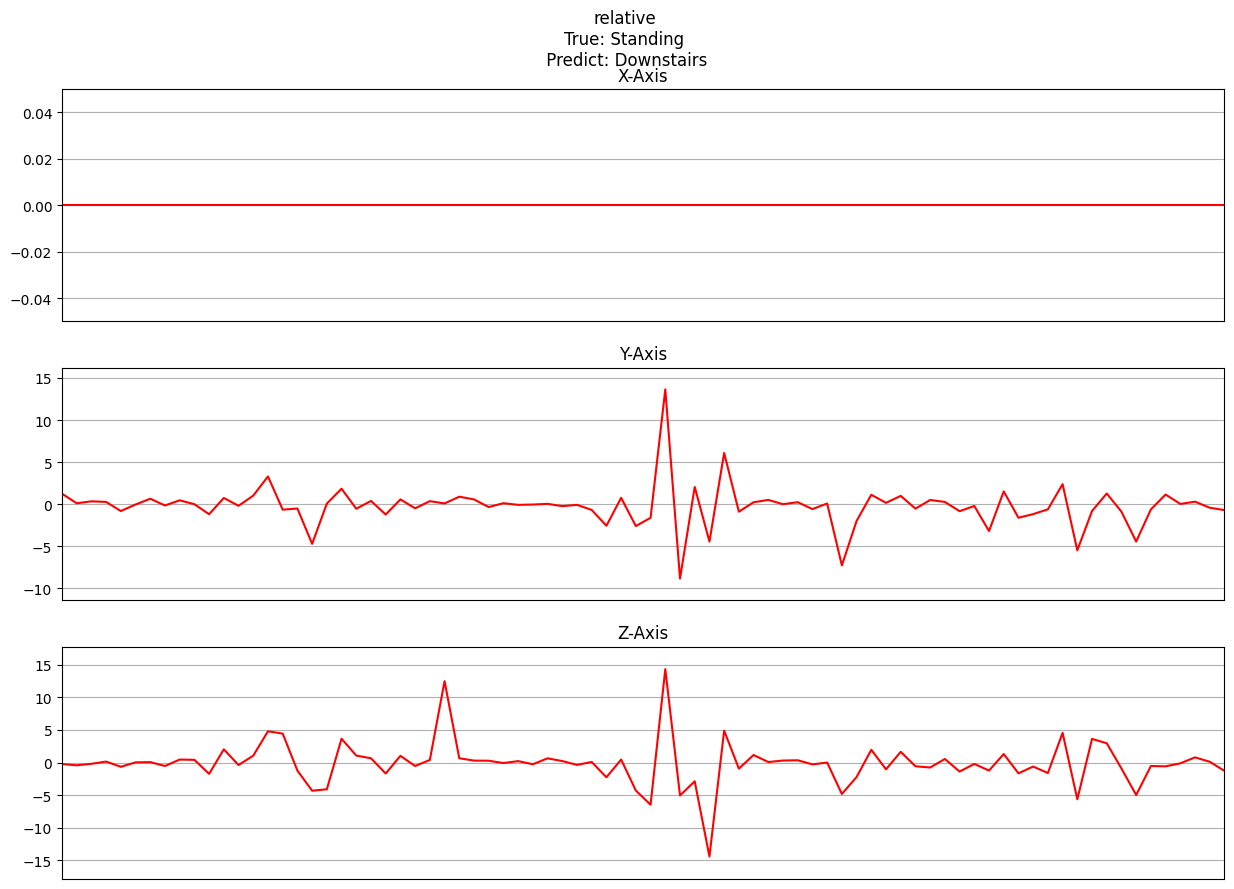

In [46]:
for idx in predicts.loc[(predicts.predict != predicts.true)&(predicts.true==3)].index:
    plot_activity(f"relative\nTrue: {param['LABELS'][predicts.loc[idx,'true']]}\n Predict: {param['LABELS'][predicts.loc[idx,'predict']]}",
                    x_test[idx] - np.tile(x_test[idx,:,0], (3,1)).T
)